**Import necessar Libraries**

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

**Load Dataset**


In [63]:
data = pd.read_csv('/content/sample_data/energy.csv')

**Data Exploration**

In [64]:
print(data.describe())
print(data.info())

       Unix Timestamp  Transaction_ID   Television        Dryer         Oven  \
count    7.572000e+03     7572.000000  7572.000000  7572.000000  7572.000000   
mean     1.639695e+09    24519.503170     0.194136     0.200343     0.197966   
std      3.568509e+07    14144.302272     0.395560     0.400284     0.398493   
min      1.577837e+09        1.000000     0.000000     0.000000     0.000000   
25%      1.608529e+09    12166.250000     0.000000     0.000000     0.000000   
50%      1.640303e+09    24760.500000     0.000000     0.000000     0.000000   
75%      1.670712e+09    36813.500000     0.000000     0.000000     0.000000   
max      1.701387e+09    48972.000000     1.000000     1.000000     1.000000   

       Refrigerator    Microwave  Line Voltage      Voltage  Apparent Power  \
count   7572.000000  7572.000000   7572.000000  7572.000000     7572.000000   
mean       0.204569     0.202985    229.524036   225.029054     1748.818014   
std        0.403413     0.402248      5.79

**Data Cleansing**

In [65]:
data = data.dropna()  # Drop any rows with missing values
data = data.drop(columns=['Unix Timestamp'])  # Drop irrelevant columns

**Calculate Energy Efficiency for each Appliances**

In [66]:
# Calculate an Efficiency Index
data['Efficiency Index'] = data['Energy Consumption (kWh)'] / data['Apparent Power']

In [67]:
# Normalize the Efficiency Index
scaler = MinMaxScaler()
data['Normalized Efficiency Index'] = scaler.fit_transform(data[['Efficiency Index']])

In [68]:
# Categorize into 'A' to 'D'
conditions = [
    (data['Normalized Efficiency Index'] <= 0.25),
    (data['Normalized Efficiency Index'] > 0.25) & (data['Normalized Efficiency Index'] <= 0.50),
    (data['Normalized Efficiency Index'] > 0.50) & (data['Normalized Efficiency Index'] <= 0.75),
    (data['Normalized Efficiency Index'] > 0.75)
]
choices = ['D', 'C', 'B', 'A']

# Categorize data based on conditions
data['Energy Efficiency Rating'] = pd.cut(
    data['Normalized Efficiency Index'],
    bins=[0, 0.25, 0.50, 0.75, 1.0],
    labels=choices,
    include_lowest=True
)

In [ ]:
# Save the processed data with the Energy Efficiency Rating to a new CSV file
data[['Transaction_ID', 'Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave', 'Line Voltage', 'Voltage', 'Apparent Power', 'Energy Consumption (kWh)', 'Offloading Decision', 'Bandwidth', 'Energy Efficiency Rating']].to_csv('/content/processed_energy_efficiency.csv', index=False)

In [70]:
# Print updated dataset preview
print(data.head())

   Transaction_ID  Television  Dryer  Oven  Refrigerator  Microwave  \
0               1           0      0     0             1          0   
1               3           0      1     0             0          0   
2              25           0      1     0             0          0   
3              29           0      0     0             1          0   
4              32           0      1     0             0          0   

   Line Voltage  Voltage  Apparent Power  Energy Consumption (kWh)  \
0           237      233            1559                     24.00   
1           223      222            1684                     70.46   
2           233      225            1794                     15.95   
3           227      224            1890                     59.74   
4           236      228            1516                     54.08   

   Offloading Decision  Bandwidth  Efficiency Index  \
0                    0      30741          0.015394   
1                    1      44253         

**New Path for Preprocessed Dataset**

In [71]:
data = pd.read_csv('/content/processed_energy_efficiency.csv')

In [72]:
print(data.head())

   Transaction_ID  Television  Dryer  Oven  Refrigerator  Microwave  \
0               1           0      0     0             1          0   
1               3           0      1     0             0          0   
2              25           0      1     0             0          0   
3              29           0      0     0             1          0   
4              32           0      1     0             0          0   

   Line Voltage  Voltage  Apparent Power  Energy Consumption (kWh)  \
0           237      233            1559                     24.00   
1           223      222            1684                     70.46   
2           233      225            1794                     15.95   
3           227      224            1890                     59.74   
4           236      228            1516                     54.08   

   Offloading Decision  Bandwidth Energy Efficiency Rating  
0                    0      30741                        D  
1                    1      44

**Scatter-Plot for each Appliances**

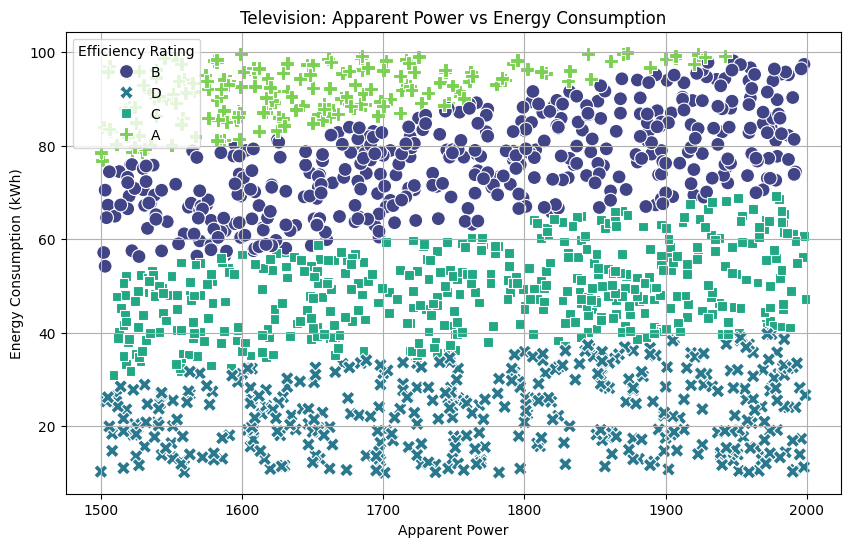

In [73]:
# Visualize 'Television' appliances with their features
television_data = data[data['Television'] == 1]  # Filter for rows where Television is active
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=television_data,
    x='Apparent Power',
    y='Energy Consumption (kWh)',
    hue='Energy Efficiency Rating',
    palette='viridis',
    style='Energy Efficiency Rating',
    s=100
)
plt.title('Television: Apparent Power vs Energy Consumption')
plt.xlabel('Apparent Power')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Efficiency Rating')
plt.grid(True)
plt.show()


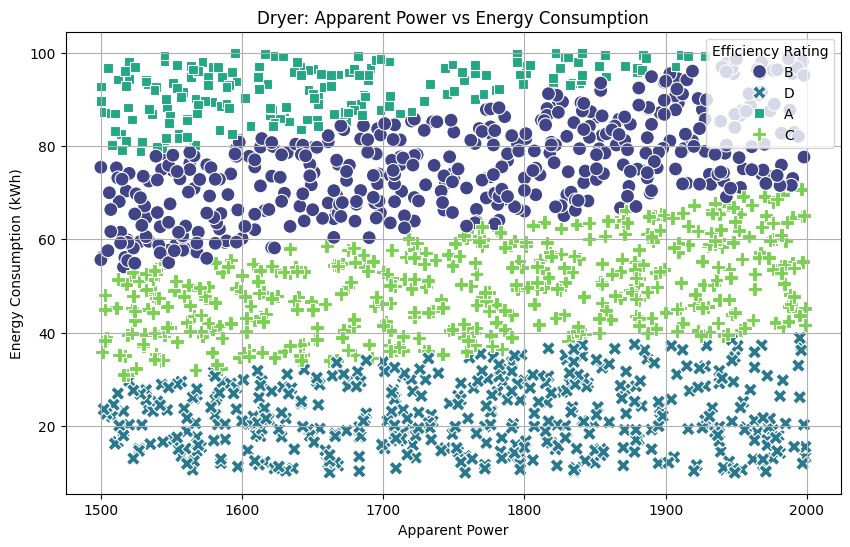

In [74]:
# Visualize 'Television' appliances with their features
television_data = data[data['Dryer'] == 1]  # Filter for rows where Television is active
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=television_data,
    x='Apparent Power',
    y='Energy Consumption (kWh)',
    hue='Energy Efficiency Rating',
    palette='viridis',
    style='Energy Efficiency Rating',
    s=100
)
plt.title('Dryer: Apparent Power vs Energy Consumption')
plt.xlabel('Apparent Power')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Efficiency Rating')
plt.grid(True)
plt.show()

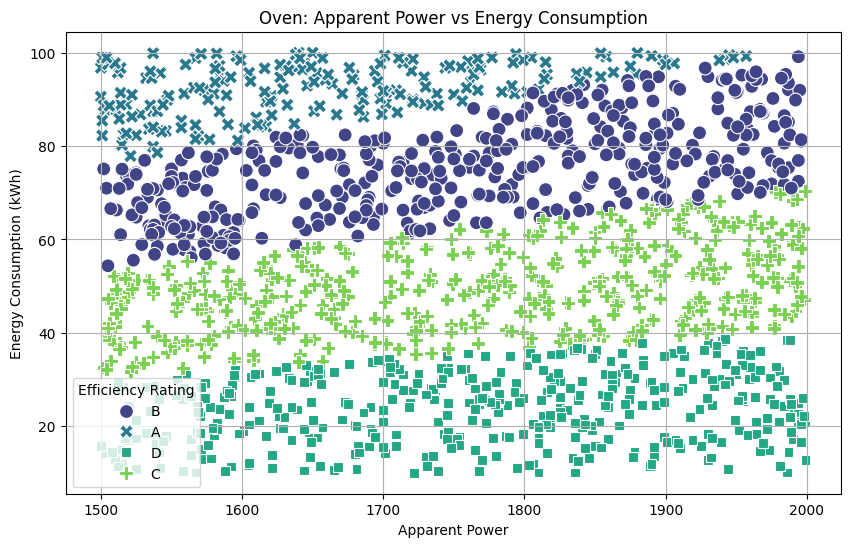

In [75]:
# Visualize 'Television' appliances with their features
television_data = data[data['Oven'] == 1]  # Filter for rows where Television is active
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=television_data,
    x='Apparent Power',
    y='Energy Consumption (kWh)',
    hue='Energy Efficiency Rating',
    palette='viridis',
    style='Energy Efficiency Rating',
    s=100
)
plt.title('Oven: Apparent Power vs Energy Consumption')
plt.xlabel('Apparent Power')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Efficiency Rating')
plt.grid(True)
plt.show()

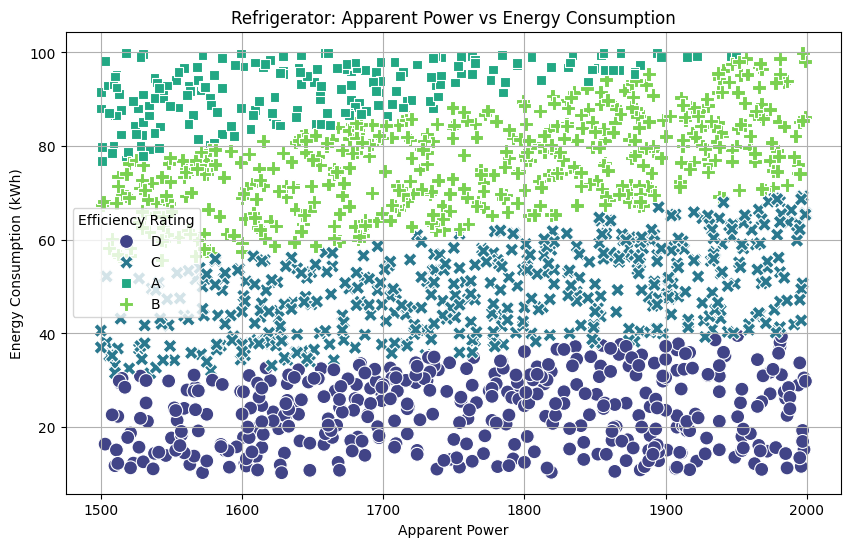

In [76]:
# Visualize 'Television' appliances with their features
television_data = data[data['Refrigerator'] == 1]  # Filter for rows where Television is active
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=television_data,
    x='Apparent Power',
    y='Energy Consumption (kWh)',
    hue='Energy Efficiency Rating',
    palette='viridis',
    style='Energy Efficiency Rating',
    s=100
)
plt.title('Refrigerator: Apparent Power vs Energy Consumption')
plt.xlabel('Apparent Power')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Efficiency Rating')
plt.grid(True)
plt.show()

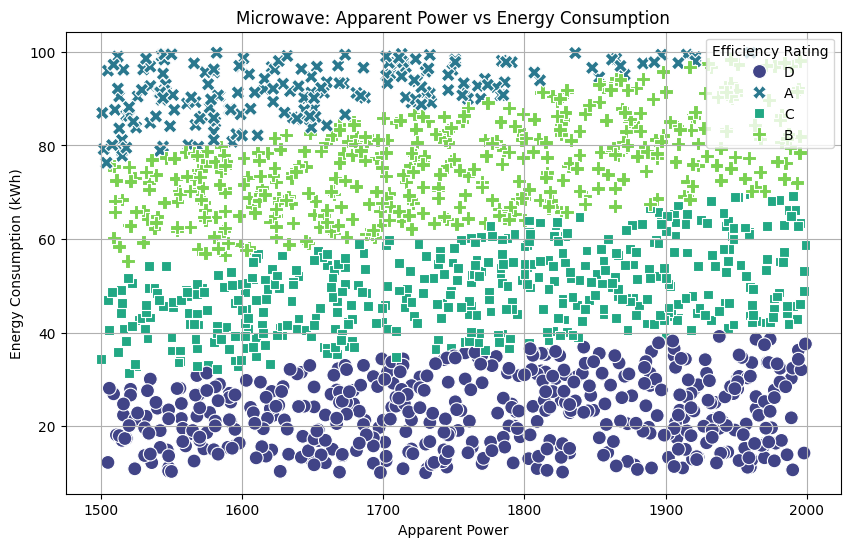

In [77]:
# Visualize 'Television' appliances with their features
television_data = data[data['Microwave'] == 1]  # Filter for rows where Television is active
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=television_data,
    x='Apparent Power',
    y='Energy Consumption (kWh)',
    hue='Energy Efficiency Rating',
    palette='viridis',
    style='Energy Efficiency Rating',
    s=100
)
plt.title('Microwave: Apparent Power vs Energy Consumption')
plt.xlabel('Apparent Power')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(title='Efficiency Rating')
plt.grid(True)
plt.show()

**Conclusion on Appliences that has the highest 'A' rating in energy efficiency rating**

In [103]:
# Filter data for 'A' energy efficiency rating
filtered_data = data[data['Energy Efficiency Rating'] == 'A']

In [104]:
# List of appliance columns
appliances = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']

In [105]:
# Count the number of 'A' ratings for each appliance
appliance_counts = {appliance: filtered_data[appliance].sum() for appliance in appliances}

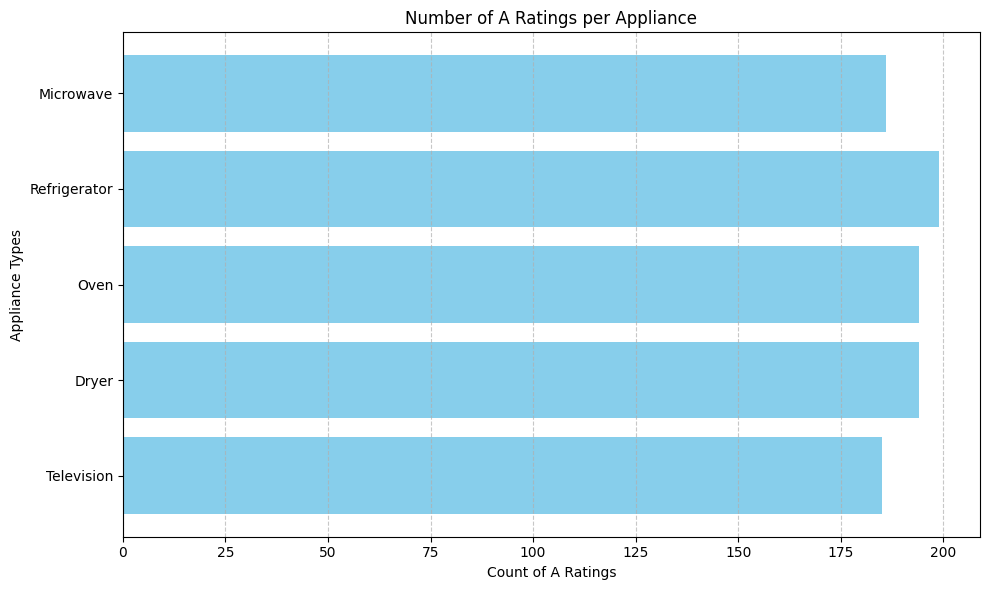

In [106]:
# Create a bar plot to visualize the number of 'A' ratings for each appliance
plt.figure(figsize=(10, 6))

appliance_names = list(appliance_counts.keys())
counts = list(appliance_counts.values())

plt.barh(appliance_names, counts, color='skyblue')
plt.title('Number of A Ratings per Appliance')
plt.xlabel('Count of A Ratings')
plt.ylabel('Appliance Types')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Conclusion on Appliances that has the highest 'D' rating in energy efficiency rating**

In [107]:
# Filter data for 'D' energy efficiency rating
filtered_data = data[data['Energy Efficiency Rating'] == 'D']

In [108]:
# List of appliance columns
appliances = ['Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']

In [109]:
# Count the number of 'D' ratings for each appliance
appliance_counts = {appliance: filtered_data[appliance].sum() for appliance in appliances}

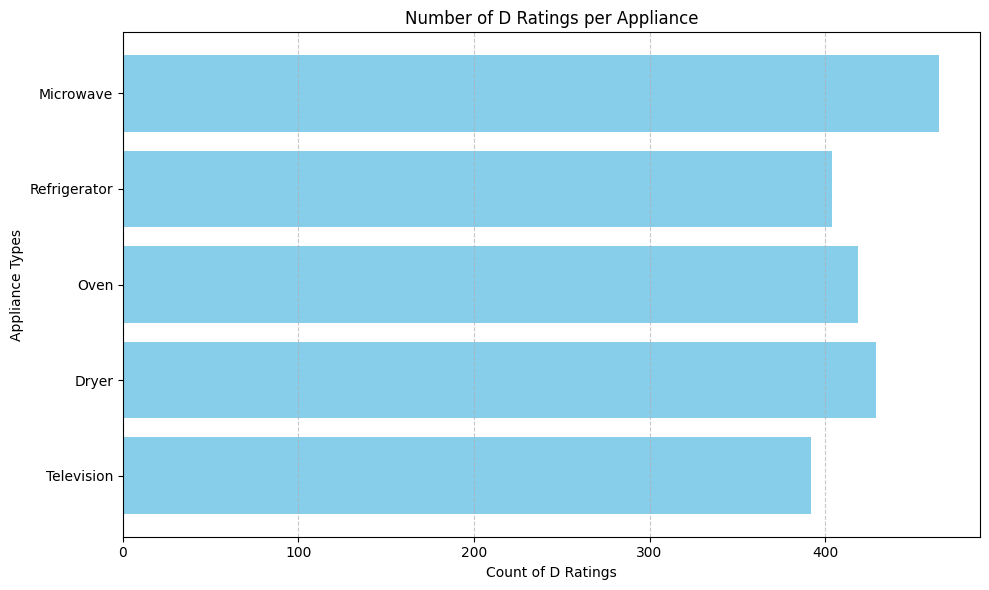

In [110]:
# Create a bar plot to visualize the number of 'D' ratings for each appliance
plt.figure(figsize=(10, 6))

appliance_names = list(appliance_counts.keys())
counts = list(appliance_counts.values())

plt.barh(appliance_names, counts, color='skyblue')
plt.title('Number of D Ratings per Appliance')
plt.xlabel('Count of D Ratings')
plt.ylabel('Appliance Types')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Splitting Data**

In [78]:
# Select features and target
features_columns = ['Apparent Power', 'Energy Consumption (kWh)', 'Television', 'Dryer', 'Oven', 'Refrigerator', 'Microwave']
target_column = 'Energy Efficiency Rating'


In [79]:
features = data[features_columns]
target = data[target_column]


In [80]:
# Scale the numerical features
scaler = StandardScaler()
# Only scale the numerical data (excluding one-hot encoded appliance types)
features_scaled = features.copy()
features_scaled[['Apparent Power', 'Energy Consumption (kWh)']] = scaler.fit_transform(features[['Apparent Power', 'Energy Consumption (kWh)']])


In [81]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [82]:
# Output the shapes of the resulting splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (6057, 7)
Testing set shape: (1515, 7)


**Training**

In [83]:
# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, min_samples_leaf=2, max_features='sqrt', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [84]:
# Predict on the test data
y_pred = model.predict(X_test)

**Evaluate**

In [85]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [86]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_mat)
print("Classification Report:")
print(class_report)

Accuracy: 0.9762376237623762
Confusion Matrix:
[[186  17   0   0]
 [  3 441   6   0]
 [  0   4 431   3]
 [  0   0   3 421]]
Classification Report:
              precision    recall  f1-score   support

           A       0.98      0.92      0.95       203
           B       0.95      0.98      0.97       450
           C       0.98      0.98      0.98       438
           D       0.99      0.99      0.99       424

    accuracy                           0.98      1515
   macro avg       0.98      0.97      0.97      1515
weighted avg       0.98      0.98      0.98      1515



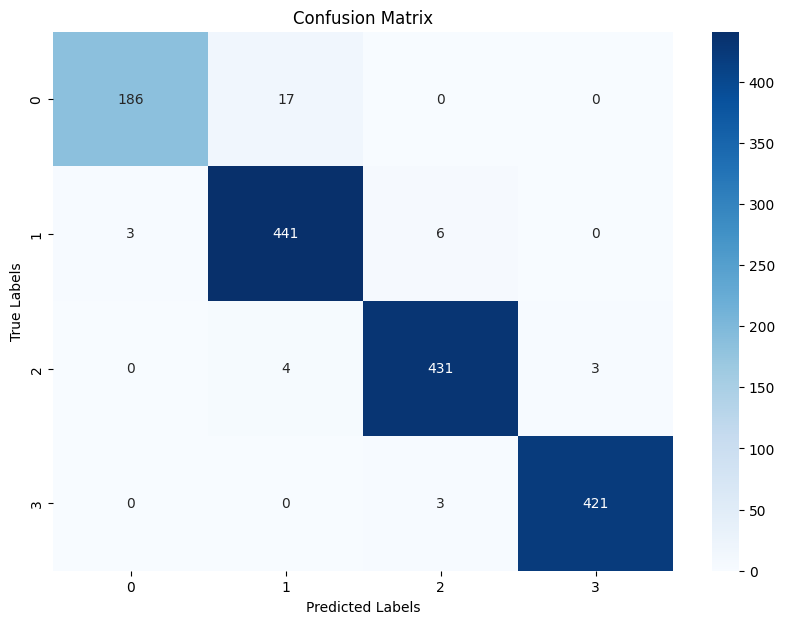

In [87]:
# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Prediction**

In [102]:
def predict_efficiency():
    print("\n---- Energy Efficiency Predictor ----\n")

    # Appliance codes and names
    appliance_codes = {'Television': 0, 'Dryer': 1, 'Oven': 2, 'Refrigerator': 3, 'Microwave': 4}
    reverse_appliance_codes = {v: k for k, v in appliance_codes.items()}  # Reverse mapping for number input

    # User inputs
    appliance_input = input("Enter appliance code (Television = 0, Dryer = 1, Oven = 2, Refrigerator = 3, Microwave = 4): ").strip().capitalize()
    apparent_power = float(input("Enter Apparent Power (e.g., 1500): "))
    energy_consumption = float(input("Enter Energy Consumption in kWh (e.g., 50.0): "))

    # Determine if input is name or code
    if appliance_input.isdigit():
        appliance_code = int(appliance_input)
        appliance_name = reverse_appliance_codes.get(appliance_code, "Invalid")
    else:
        appliance_name = appliance_input
        appliance_code = appliance_codes.get(appliance_name, -1)

    # Check if the appliance code was found
    if appliance_name == "Invalid" or appliance_code == -1:
        print("Invalid appliance name or code entered. Please enter a valid appliance name or code.")
        return

    # Prepare input for prediction
    user_input = [apparent_power, energy_consumption]

    # Scale numerical features
    user_input_scaled = scaler.transform([user_input])[0].tolist() # Scale only the numerical features

    # Create one-hot encoded features for the appliances
    appliance_features = [0] * len(appliance_codes)  # Initialize a list of zeros with length = number of appliances
    for appliance_name_key, appliance_code_key in appliance_codes.items():
      if appliance_code == appliance_code_key:
        appliance_features[appliance_code_key] = 1
        break

    # Combine the scaled numerical features and the one-hot encoded appliance features
    user_input_scaled = user_input_scaled + appliance_features

    # Predict using the trained model
    user_prediction = model.predict([user_input_scaled])

    # Display the result
    print(f"\nPredicted Energy Efficiency Rating for {appliance_name}: {user_prediction[0]}")

# Call the prediction function
predict_efficiency()


---- Energy Efficiency Predictor ----

Enter appliance code (Television = 0, Dryer = 1, Oven = 2, Refrigerator = 3, Microwave = 4): 1
Enter Apparent Power (e.g., 1500): 1559
Enter Energy Consumption in kWh (e.g., 50.0): 24

Predicted Energy Efficiency Rating for Dryer: D


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
